# Challenge set 3: Linear Regression and Train/Test split

### Exercise 3.1 Linear Regression with constant

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split


%matplotlib inline

/Users/Nils/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [161]:
def RMSE(y_test, y_predict):
    RMSE = (sum((y_predict - y_test)**2)/len(y_test))**0.5
    return RMSE

def plot_predict(y_test, y_predict):
    fig, ax = plt.subplots(1, 1, figsize = (10, 5))
    ax.scatter(y_test, y_predict, alpha = 0.25)
    ax.plot(np.linspace(min(y_test), max(y_test), 2), np.linspace(min(y_test), max(y_test), 2), 'r--')
    ax.set_xlabel('y test', fontsize = 20)
    ax.set_ylabel('y predict', fontsize = 20)
    ax.set_title(('RMSE = ' + str(RMSE(y_test, y_predict)) + '| R - Squared = ' + str(calc_RSquared(y_test, y_predict))), fontsize = 20)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)

def calc_RSquared(y_test, y_predict):
    SS_total = np.sum((y_test - np.mean(y_test))**2)
    SS_res = np.sum((y_test - y_predict)**2)
    return (1 - SS_res/SS_total)

In [153]:
movie_df = pd.read_csv('2013_movies.csv')

In [154]:
movie_df['constant'] = 1

In [155]:
lm1 = LinearRegression()
X = movie_df['constant'].reshape(-1,1)
y = movie_df['DomesticTotalGross']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lm1.fit(X_train, y_train)
lm1.score(X_test, y_test)

-0.036088604793281798

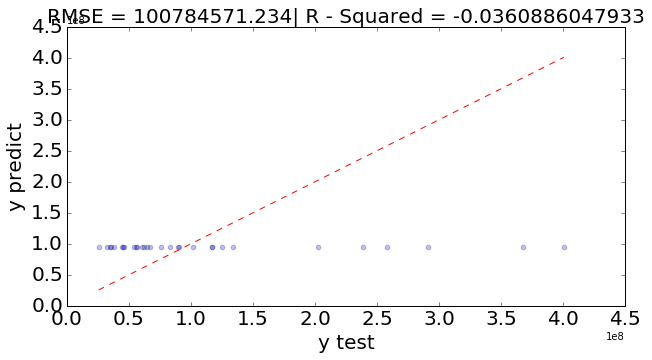

In [162]:
plot_predict(y_test, lm1.predict(X_test))

#### Interpretation of Result

R-sqrd of 0 represents that the constant cannot predict the target value. The predicted value just equals the mean of the continuous target.

(array([ 13.,   6.,   5.,   0.,   1.,   1.,   1.,   1.,   0.,   2.]),
 array([ -6.93857301e+07,  -3.18687543e+07,   5.64822154e+06,
          4.31651973e+07,   8.06821731e+07,   1.18199149e+08,
          1.55716125e+08,   1.93233101e+08,   2.30750076e+08,
          2.68267052e+08,   3.05784028e+08]),
 <a list of 10 Patch objects>)

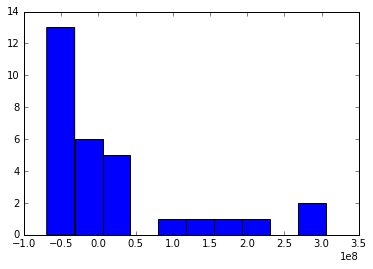

In [169]:
# Plot of residuals

plt.hist(y_test-lm1.predict(X_test))

#### Distribution of residuals

Mostly between -0.5le8 and 0.5le8 with some outliers representing movies with very large revenues

### Exercise 3.2 Add one continuous variable (runtime)

In [185]:
X2 = movie_df[['Runtime']]

In [186]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.3)

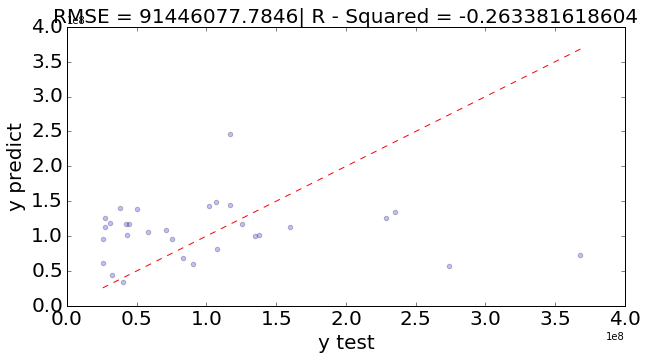

In [187]:
lm2 = LinearRegression()
lm2.fit(X_train, y_train)

# Model prediction vs. outcome

plot_predict(y_test,lm2.predict(X_test))

(array([ 13.,   4.,   6.,   3.,   0.,   1.,   1.,   1.,   0.,   1.]),
 array([ -6.92716011e+07,  -3.50337126e+07,  -7.95824057e+05,
          3.34420644e+07,   6.76799529e+07,   1.01917841e+08,
          1.36155730e+08,   1.70393618e+08,   2.04631507e+08,
          2.38869395e+08,   2.73107284e+08]),
 <a list of 10 Patch objects>)

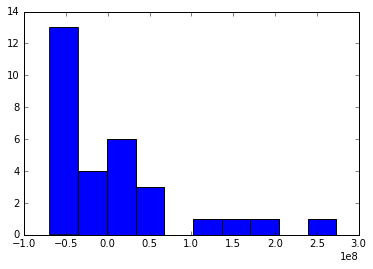

In [196]:
# Plot of residuals

plt.hist(y_test-lm1.predict(X_test))

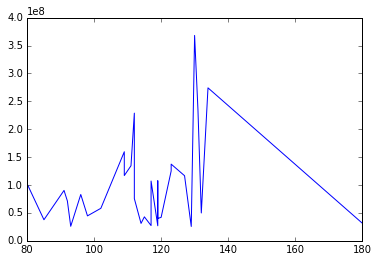

In [195]:
# Model prediction vs. Feature

X_test.sort_values('Runtime')

plt.plot(X_test.sort_values('Runtime'),y_test)

### Exercise 3.3 Dummy variable

In [205]:
# Dummy variable whether rat_G or not

def allocate_rating(rating):
    rat_PG = 0
    if rating == "PG":
        rat_PG=1        
    return (rat_PG)

In [213]:
movie_df['Rat']=movie_df['Rating'].map(allocate_rating)

In [214]:
lm3 = LinearRegression()
X3 = movie_df[['Rat', 'Runtime']]

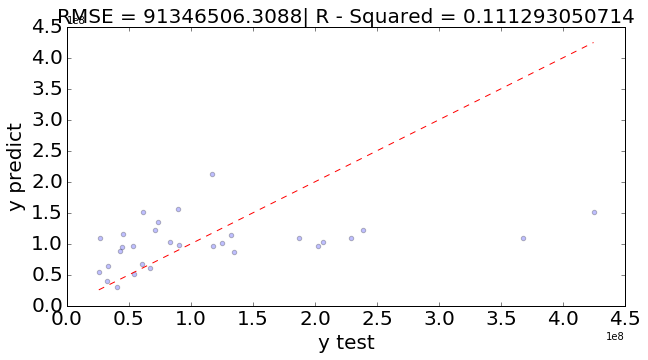

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X3,y, test_size=0.3)
lm3.fit(X_train,y_train)
plot_predict(y_test,lm3.predict(X_test))

### Exercise 3.4

In [233]:
movie_df2=movie_df.dropna(how='any')
X4=movie_df2[['Budget', 'Rat', 'Runtime']]
y2 = movie_df2['DomesticTotalGross']

In [234]:
lm4=LinearRegression()

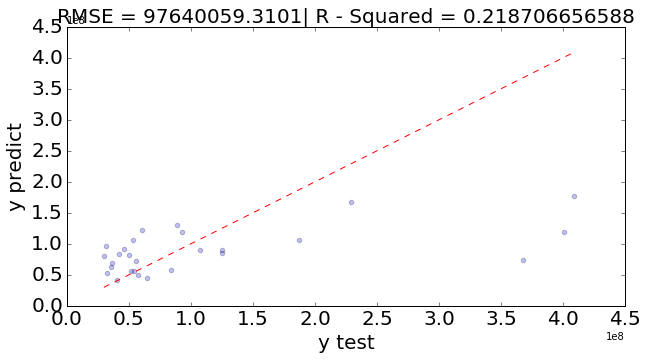

In [235]:
X_train, X_test, y_train, y_test = train_test_split(X4,y2, test_size=0.3)
lm4.fit(X_train,y_train)
plot_predict(y_test, lm4.predict(X_test))

### Excercise 3.5 (already done in 3.1-3.4)